In [ ]:
import os

!apt-get install aria2 -y

actor_ids = [f"{i:02d}" for i in range(1, 25)]

base_url = "https://zenodo.org/records/1188976/files/Video_Speech_Actor_"

save_dir = "ravdess_video_speech"

os.makedirs(save_dir, exist_ok=True)

for actor_id in actor_ids:
    file_url = f"{base_url}{actor_id}.zip?download=1"
    zip_path = f"{save_dir}/Video_Speech_Actor_{actor_id}.zip"

    print(f"🚀 Downloading: {file_url}")
    os.system(f"aria2c -x 16 -s 16 '{file_url}' -o {zip_path}")

    print(f"📂 Extracting: Video_Speech_Actor_{actor_id}.zip")
    os.system(f"unzip -q {zip_path} -d {save_dir}")

print("✅ All video speech files downloaded and extracted successfully!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 1s (2,293 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubun

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
from google.colab import files

video_root_folder = "ravdess_video_speech"
output_frame_folder = "video_frames"

actor = 1
video_file = "01-01-01-01-01-01-01.mp4"

actor_folder = os.path.join(video_root_folder, f"Actor_{actor:02d}/")
output_folder = os.path.join(output_frame_folder, f"Actor_{actor:02d}", "neutral")
os.makedirs(output_folder, exist_ok=True)

video_path = os.path.join(actor_folder, video_file)
cap = cv2.VideoCapture(video_path)

frame_count = 0
saved_frames = 0
frame_skip = 5

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_skip == 0:
        frame_filename = os.path.join(output_folder, f"{video_file[:-4]}_frame{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)
        saved_frames += 1

        cv2_imshow(frame)

        files.download(frame_filename)

    frame_count += 1

cap.release()

print(f" Extracted {saved_frames} frames from {video_file}")


## EXTRACTING FRAMES FROM VIDEO

In [ ]:
import cv2
import os
import shutil

video_root_folder = "ravdess_video_speech"
output_frame_folder = "video_frames"

frame_skip = 5

emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

if os.path.exists(output_frame_folder):
    shutil.rmtree(output_frame_folder)
os.makedirs(output_frame_folder, exist_ok=True)

print("✅ Cleared output directory before extraction.")

for actor in range(1, 25):
    actor_folder = os.path.join(video_root_folder, f"Actor_{actor:02d}/")

    if os.path.exists(actor_folder):
        print(f"🚀 Processing Actor {actor:02d}...")

        for video_file in os.listdir(actor_folder):
            if video_file.endswith(".mp4"):

                if video_file.startswith("02"):
                    print(f"❌ Skipping Video-Only file: {video_file}")
                    continue

                emotion_code = video_file.split("-")[2]
                emotion = emotion_labels.get(emotion_code, "unknown")

                if emotion == "unknown":
                    print(f"❌ Skipping file {video_file} (Unknown Emotion Code)")
                    continue


                actor_output_folder = os.path.join(output_frame_folder, f"Actor_{actor:02d}", emotion)
                os.makedirs(actor_output_folder, exist_ok=True)


                video_path = os.path.join(actor_folder, video_file)
                cap = cv2.VideoCapture(video_path)
                frame_count = 0
                saved_frames = 0

                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break

                    if frame_count % frame_skip == 0:
                        frame_filename = os.path.join(actor_output_folder, f"{video_file[:-4]}_frame{frame_count}.jpg")
                        cv2.imwrite(frame_filename, frame)
                        saved_frames += 1

                    frame_count += 1

                cap.release()
                print(f" Extracted {saved_frames} frames from {video_file} (Original: {frame_count})")

print("🎉 All video frames extracted and organized successfully!")


✅ Cleared output directory before extraction.
🚀 Processing Actor 01...
✅ Extracted 22 frames from 01-01-06-01-01-01-01.mp4 (Original: 109)
✅ Extracted 21 frames from 01-01-08-01-02-01-01.mp4 (Original: 105)
✅ Extracted 30 frames from 01-01-06-02-01-01-01.mp4 (Original: 149)
❌ Skipping Video-Only file: 02-01-01-01-01-02-01.mp4
❌ Skipping Video-Only file: 02-01-06-02-02-01-01.mp4
✅ Extracted 24 frames from 01-01-07-01-02-01-01.mp4 (Original: 116)
✅ Extracted 25 frames from 01-01-07-02-01-02-01.mp4 (Original: 122)
✅ Extracted 22 frames from 01-01-06-01-02-02-01.mp4 (Original: 110)
❌ Skipping Video-Only file: 02-01-07-02-02-02-01.mp4
❌ Skipping Video-Only file: 02-01-04-02-02-02-01.mp4
❌ Skipping Video-Only file: 02-01-02-02-02-02-01.mp4
❌ Skipping Video-Only file: 02-01-04-02-01-01-01.mp4
❌ Skipping Video-Only file: 02-01-07-01-01-01-01.mp4
❌ Skipping Video-Only file: 02-01-06-02-01-02-01.mp4
❌ Skipping Video-Only file: 02-01-06-02-02-02-01.mp4
✅ Extracted 26 frames from 01-01-07-02-01-01

## ORGANIZING VIDEO FRAMES TO CLASSIFICATION STRUCUTURE

In [ ]:
import os
import shutil

source_dir = "/content/video_frames"
dest_dir = "/content/emotion_dataset"

emotions = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
for emotion in emotions:
    os.makedirs(os.path.join(dest_dir, emotion), exist_ok=True)

for actor_folder in os.listdir(source_dir):
    actor_path = os.path.join(source_dir, actor_folder)

    if not os.path.isdir(actor_path):
        continue

    for emotion in emotions:
        emotion_folder = os.path.join(actor_path, emotion)

        if not os.path.isdir(emotion_folder):
            continue

        for file in os.listdir(emotion_folder):
            old_path = os.path.join(emotion_folder, file)
            new_path = os.path.join(dest_dir, emotion, file)
            shutil.copy2(old_path, new_path)

print("✅ New dataset structure created at '/content/emotion_dataset/'")


✅ New dataset structure created at '/content/emotion_dataset/'


## TRAINING CNN MODEL

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import random
import os

SEED = 42

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

data_dir = "/content/emotion_dataset"

img_size = (64, 64)
num_classes = 8

emotions = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
emotion_to_label = {emotion: idx for idx, emotion in enumerate(emotions)}

X, y = [], []
for emotion in emotions:
    emotion_path = os.path.join(data_dir, emotion)
    for img_file in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        img = img / 255.0
        X.append(img)
        y.append(emotion_to_label[emotion])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Data loaded successfully!")
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=8)

print("🎉 Model Trained Successfully!")

model.save("model.keras")

print(" Model Saved!")



✅ Data loaded successfully!
Training samples: 11684, Test samples: 2921


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1309 - loss: 2.0728 - val_accuracy: 0.1434 - val_loss: 2.0626
Epoch 2/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1556 - loss: 2.0529 - val_accuracy: 0.3191 - val_loss: 1.8154
Epoch 3/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3001 - loss: 1.7904 - val_accuracy: 0.4776 - val_loss: 1.4468
Epoch 4/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.4415 - loss: 1.4764 - val_accuracy: 0.6231 - val_loss: 1.0859
Epoch 5/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5770 - loss: 1.1502 - val_accuracy: 0.7292 - val_loss: 0.8087
Epoch 6/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6916 - loss: 0.8628 - val_accuracy: 0.8083 - val_loss: 0.5701
Epoch 7/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7709 - loss: 0.6704 - val_accuracy: 0.8720 - val_loss: 0.4180
Epoch 8/25
1461/1461 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8214 - loss: 0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nClassification Report:")
print(classification_report(y_test_actual_labels, y_test_pred_labels, target_names=emotions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_actual_labels, y_test_pred_labels))



Classification Report:
              precision    recall  f1-score   support

       angry       0.97      0.94      0.95       410
        calm       0.97      0.98      0.98       405
     disgust       0.97      1.00      0.98       419
     fearful       0.96      0.95      0.95       357
       happy       0.98      0.96      0.97       385
     neutral       0.96      1.00      0.98       184
         sad       0.98      0.98      0.98       394
   surprised       0.97      0.95      0.96       367

    accuracy                           0.97      2921
   macro avg       0.97      0.97      0.97      2921
weighted avg       0.97      0.97      0.97      2921


Confusion Matrix:
[[387   1   4   5   2   0   9   2]
 [  0 398   0   0   1   3   0   3]
 [  1   0 418   0   0   0   0   0]
 [  9   0   3 338   4   0   0   3]
 [  2   8   0   5 368   0   0   2]
 [  0   0   0   0   0 184   0   0]
 [  2   0   4   0   0   0 387   1]
 [  0   3   4   4   1   5   0 350]]


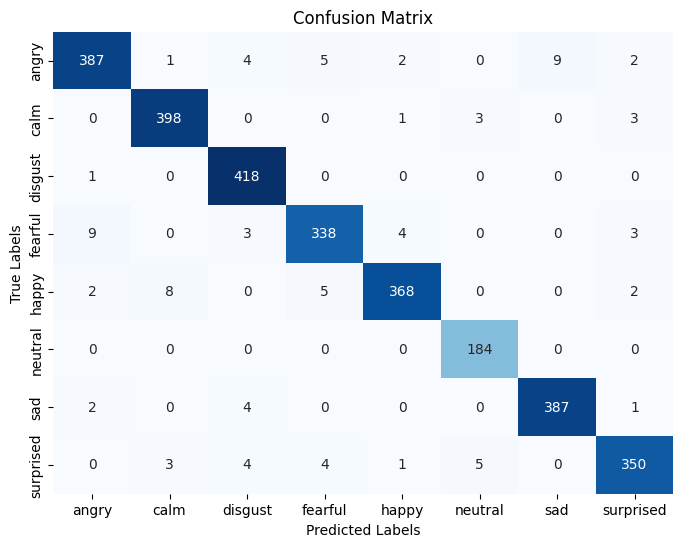

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_actual_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotions, yticklabels=emotions, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


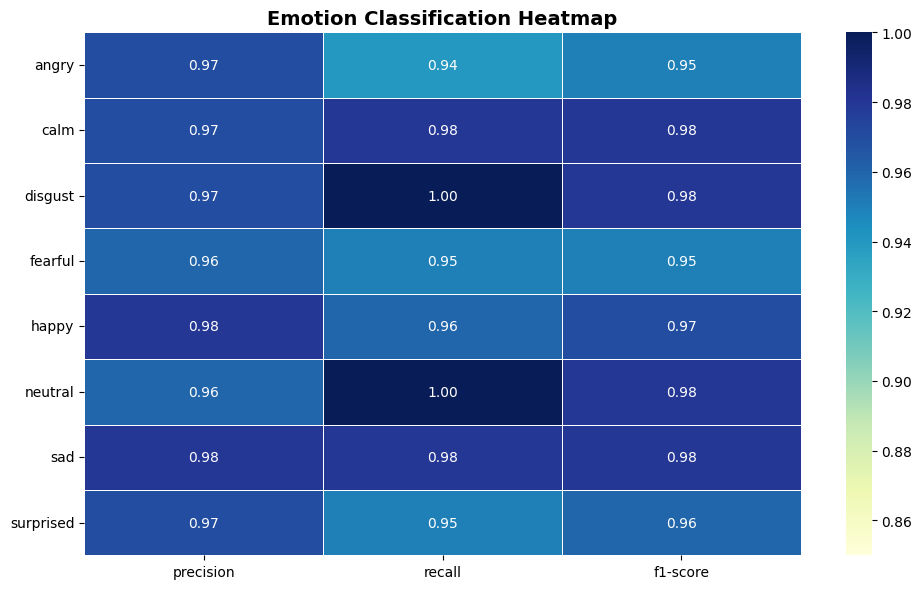

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    "precision": [0.97, 0.97, 0.97, 0.96, 0.98, 0.96, 0.98, 0.97],
    "recall":    [0.94, 0.98, 1.00, 0.95, 0.96, 1.00, 0.98, 0.95],
    "f1-score":  [0.95, 0.98, 0.98, 0.95, 0.97, 0.98, 0.98, 0.96]
}, index=["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"])

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=0.85, vmax=1.0, linewidths=0.5, fmt=".2f")

plt.title("Emotion Classification Heatmap", fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

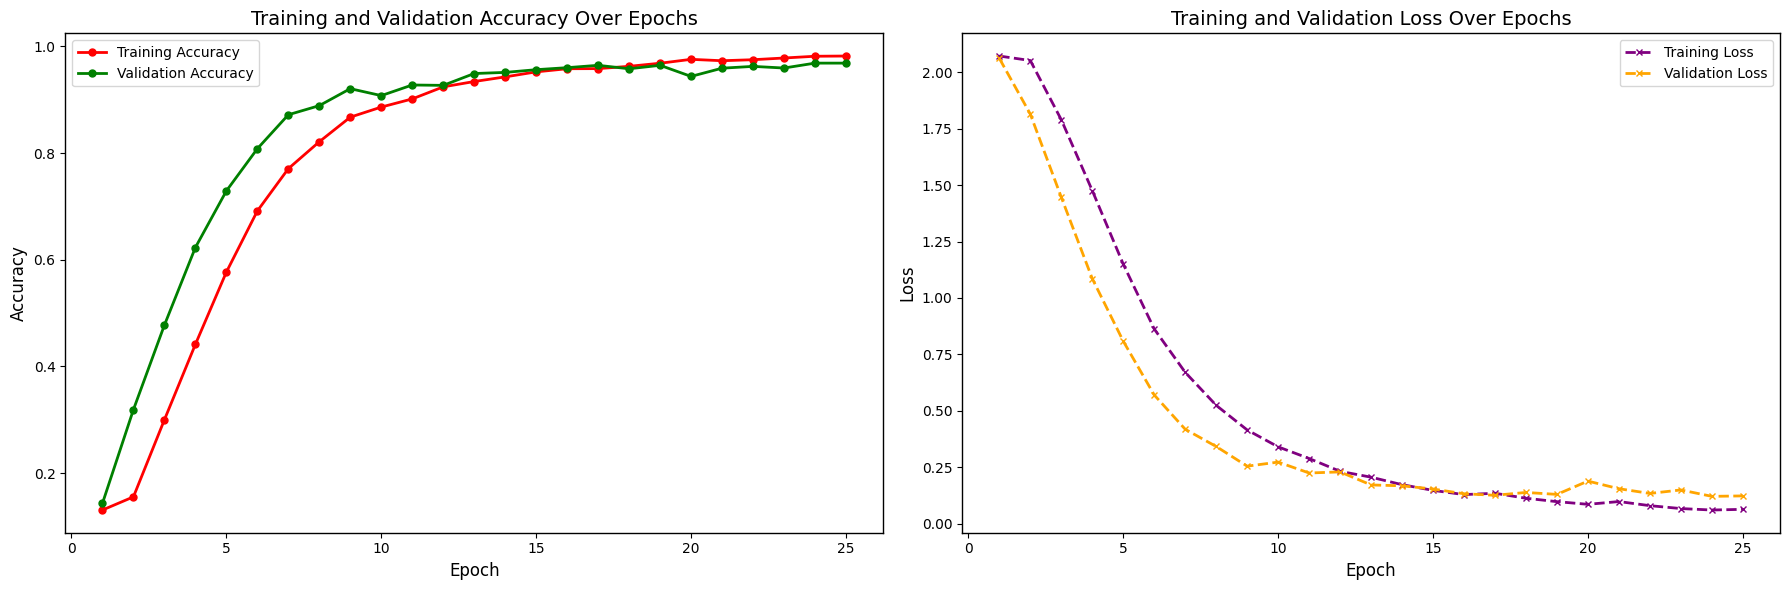

In [2]:
import matplotlib.pyplot as plt

epochs = list(range(1, 26))
train_acc = [0.1309, 0.1556, 0.3001, 0.4415, 0.5770, 0.6916, 0.7709, 0.8214, 0.8675, 0.8864, 0.9017, 0.9243, 0.9343, 0.9430, 0.9524, 0.9583, 0.9585, 0.9628, 0.9686, 0.9759, 0.9733, 0.9752, 0.9784, 0.9817, 0.9821]
val_acc = [0.1434, 0.3191, 0.4776, 0.6231, 0.7292, 0.8083, 0.8720, 0.8891, 0.9209, 0.9079, 0.9278, 0.9271, 0.9493, 0.9514, 0.9565, 0.9603, 0.9647, 0.9582, 0.9647, 0.9439, 0.9593, 0.9627, 0.9596, 0.9688, 0.9688]
train_loss = [2.0728, 2.0529, 1.7904, 1.4764, 1.1502, 0.8628, 0.6704, 0.5241, 0.4150, 0.3400, 0.2883, 0.2315, 0.2055, 0.1723, 0.1470, 0.1283, 0.1342, 0.1121, 0.0970, 0.0852, 0.0974, 0.0792, 0.0664, 0.0599, 0.0629]
val_loss = [2.0626, 1.8154, 1.4468, 1.0859, 0.8087, 0.5701, 0.4180, 0.3416, 0.2543, 0.2724, 0.2241, 0.2289, 0.1711, 0.1673, 0.1531, 0.1320, 0.1252, 0.1378, 0.1292, 0.1882, 0.1543, 0.1335, 0.1489, 0.1205, 0.1225]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(epochs, train_acc, label='Training Accuracy', color='red', linewidth=2, marker='o', markersize=5)
ax1.plot(epochs, val_acc, label='Validation Accuracy', color='green', linewidth=2, marker='o', markersize=5)
ax1.set_title('Training and Validation Accuracy Over Epochs', fontsize=14)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend()
ax1.grid(False)
ax1.set_facecolor('white')
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

ax2.plot(epochs, train_loss, label='Training Loss', color='purple', linestyle='--', linewidth=2, marker='x', markersize=5)
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2, marker='x', markersize=5)
ax2.set_title('Training and Validation Loss Over Epochs', fontsize=14)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(False)
ax2.set_facecolor('white')
for spine in ax2.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()